In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from pycaret.regression import *

In [3]:
df_train=pd.read_csv('movies_train.csv', index_col='title')
df_test=pd.read_csv('movies_test.csv', index_col='title')
submission=pd.read_csv('movies_submission.csv', index_col='title')

In [4]:
exp_reg = setup(df_train, #Train Data
                target = 'box_off_num',  
                session_id = 123,
                normalize = True, # 데이터 세트 정규화
                remove_outliers = True, # 5% 이상값 제거
                remove_multicollinearity = True, # 다중공선성 제거
                silent = True,    # 원격 커널에서 실행할때 true            
                ignore_low_variance = True, #낮은 분산 무시
                normalize_method = 'zscore', #normalize= true 경우 기본값 zscore
                use_gpu = True
               )

,Description,Value
0,session_id,123
1,Target,box_off_num
2,Original Data,"(600, 11)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(398, 401)"


In [5]:
best_model = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,711705.5003,2395142919303.6094,1414385.3034,0.1858,3.8880,636.8824,0.0460
lightgbm,Light Gradient Boosting Machine,698352.0141,2239310864427.8149,1421989.5742,0.0817,3.4485,363.3117,0.0860
rf,Random Forest Regressor,583352.1754,2404993724369.8228,1438197.3862,0.1397,2.1544,35.7588,0.4800
knn,K Neighbors Regressor,603102.8049,2479703832556.5352,1446361.7224,0.1344,2.3600,38.2137,0.2170
huber,Huber Regressor,583136.0352,2712461062148.9307,1482095.7066,0.1726,3.1625,503.9523,0.0680
et,Extra Trees Regressor,578750.5576,2891927794124.9199,1535812.8959,0.0879,2.0415,19.1844,0.5320
gbr,Gradient Boosting Regressor,670123.8811,2784404678166.8750,1557698.0270,-0.0082,2.9172,164.2305,0.2270
ridge,Ridge Regression,935078.5138,2968232476392.2959,1621653.6804,-0.1412,4.2099,2822.5900,0.0250
par,Passive Aggressive Regressor,617956.2100,3234578832528.8652,1632972.9435,-0.0088,2.7338,119.6265,0.6700
br,Bayesian Ridge,968865.7418,3228859046311.7754,1650982.7361,-0.0741,4.7339,3273.0964,0.1130


In [6]:
en = create_model('en', cross_validation=False)
lightgbm = create_model('en', cross_validation=False)
rf = create_model('rf', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,685055.8367,2.661383e+12,1.631375e+06,0.325,3.0087,79.8134


In [8]:
# 하이퍼파라미터 튜닝
# 모델 하이퍼파라미터 튜닝(Tune)

tuned_en = tune_model(en, optimize='RMSE', n_iter=100)
tuned_lightgbm = tune_model(lightgbm, optimize='RMSE', n_iter=100)
tuned_rf = tune_model(rf, optimize='RMSE', n_iter=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,490954.2054,1558983000149.0996,1248592.4075,0.3801,2.3098,11.9504
1,354480.3904,789470429719.0028,888521.4852,-0.3339,2.1618,4.1278
2,503327.7663,1190190490482.9395,1090958.5191,0.2169,2.0904,72.9403
3,289855.0349,655404794252.3319,809570.7469,0.5500,1.8670,3.8301
4,398013.3801,1024379772456.4738,1012116.4817,0.1808,2.0077,8.0253
5,886873.5939,5025349319032.5361,2241729.0914,0.1819,2.3966,38.3677
6,247997.8737,331275321561.1398,575565.2192,0.4639,1.9245,8.2512
7,880946.0435,7231281899372.2783,2689104.2931,0.2310,2.5228,70.5265
8,624738.6698,3583728340045.5991,1893073.7809,0.2306,1.7136,1.8408


In [9]:
# 블렌딩
# 모델 블렌딩(Blend)

blender_specific = blend_models(estimator_list = [tuned_en,tuned_lightgbm,tuned_rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,604962.8614,1678549176868.5789,1295588.3516,0.3326,3.7749,125.3504
1,458239.7146,903217826448.3470,950377.7283,-0.5261,3.4402,77.8268
2,585074.6274,1067647186259.9066,1033270.1420,0.2975,3.4219,3963.4755
3,429173.5519,835480665630.7412,914046.3148,0.4264,3.2122,66.1260
4,421991.4054,756310317266.1306,869661.0358,0.3952,3.9724,273.3945
5,1003025.3717,5136642756065.2549,2266416.2804,0.1638,3.7788,992.7852
6,386786.4845,319329651411.5926,565092.6043,0.4833,4.0011,318.6577
7,965895.9682,7091531403275.4561,2662992.9409,0.2458,4.1627,667.3217
8,712328.8203,3673259441872.5664,1916574.9247,0.2114,2.5778,30.5819


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


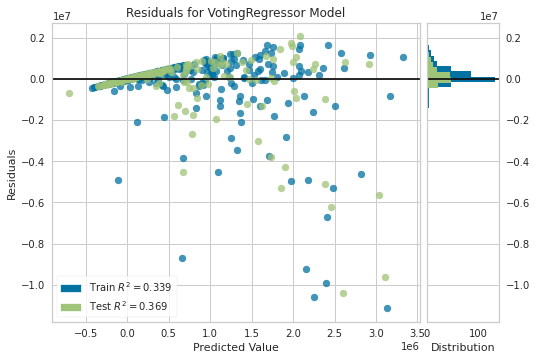

In [10]:
# 시각화
# 모델 시각화(plot)

plot_model(blender_specific)

In [11]:
y_train = df_train['box_off_num']

In [12]:
# 학습 및 예측
# 마지막 학습 및 예측(Finalize, Predict)

# 마지막 학습(Finalize)
final_model = finalize_model(blender_specific)

# 예측(Predict)
prediction = predict_model(final_model, data=df_test)

In [13]:
prediction

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,Label
title,,,,,,,,,,,
용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,1.614055e+06
아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,1.028312e+06
하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,1.824239e+06
의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,1.776414e+06
평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,1.260025e+06
...,...,...,...,...,...,...,...,...,...,...,...
해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4,-2.386383e+05
울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,-6.161096e+04
어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,7.764362e+05


In [14]:
submission['box_off_num'] = prediction['Label']
submission.to_csv('automl_setup.csv')